In [20]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd

# Uses raw data
matdata = loadmat("../Data/SpineMidData_21032018.mat")
spineMidData=matdata['SpineMidData']

# Uses preprocessed csv data
csvdata = csv.reader(open('../Data/preprocessed_SpineMidData_withStringCols.csv', 'r'), delimiter=',')

In [2]:
#Seperate ID's into different parts, i.e ID, A or B, segment

# For raw data
counter = 0
more_walks = []
for i in spineMidData[2:,0]:
    counter += 1
    nmbrs = list(i[0])
    nmbrs[0:3] = [''.join(nmbrs[0:3])]
    #print(nmbrs)
    #rint(counter)
    
print('Hello')

usableID = []

# For CSV data
csvdata = csv.reader(open('../Data/preprocessed_incl_std.csv', 'r'), delimiter=',')
for row in csvdata:
    nmbrs = list(row[1])
    nmbrsL = row[1]
    nmbrsL = nmbrsL[:-1]
    nmbrs[0:3] = [''.join(nmbrs[0:3])]
    #print(nmbrs)
    #print(row[1])
    usableID.append(nmbrsL)

usableID.pop(0)
#print(len(usableID))
#print(usableID)
   

Hello


'TestI'

In [3]:
count = 0
for ID in usableID:
    nmbrs = list(ID)
    nmbrs[0:3] = [''.join(nmbrs[0:3])]
    print(nmbrs)
    print(count)
    count += 1

['006', 'A', '0', '1']
0
['006', 'A', '0', '1']
1
['006', 'A', '0', '1']
2
['006', 'A', '0', '1']
3
['009', 'A', '0', '1']
4
['009', 'A', '0', '1']
5
['009', 'A', '0', '1']
6
['009', 'A', '0', '1']
7
['010', 'A', '0', '1']
8
['010', 'A', '0', '1']
9
['010', 'A', '0', '1']
10
['010', 'A', '0', '1']
11
['011', 'A', '0', '1']
12
['011', 'A', '0', '1']
13
['011', 'A', '0', '1']
14
['011', 'A', '0', '1']
15
['013', 'A', '0', '1']
16
['013', 'A', '0', '1']
17
['013', 'A', '0', '1']
18
['013', 'A', '0', '1']
19
['014', 'A', '0', '1']
20
['014', 'A', '0', '1']
21
['014', 'A', '0', '1']
22
['014', 'A', '0', '1']
23
['015', 'A', '0', '1']
24
['015', 'A', '0', '1']
25
['015', 'A', '0', '1']
26
['015', 'A', '0', '1']
27
['016', 'A', '0', '1']
28
['016', 'A', '0', '1']
29
['016', 'A', '0', '1']
30
['016', 'A', '0', '1']
31
['017', 'A', '0', '1']
32
['017', 'A', '0', '1']
33
['017', 'A', '0', '1']
34
['017', 'A', '0', '1']
35
['018', 'A', '0', '1']
36
['018', 'A', '0', '1']
37
['018', 'A', '0', '1']

In [4]:
# select relevant data

print(spineMidData[:,1].size)

segmentList = []

for i in range(spineMidData[:,0].size):
    ID = spineMidData[i,0]
    #print(ID)
    if ID[0] in usableID:
        segmentList.append(spineMidData[i,7])

segmentData = np.array(segmentList)
print(segmentData.size)

1663
720


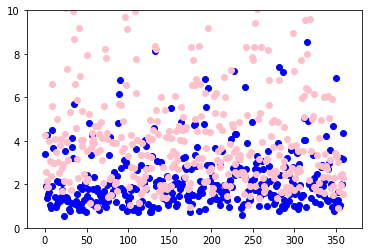

In [25]:
#Welke start??? 360 of 359?
Bstart = 360

distances = []
distancesGl = []

for i in range(Bstart):
    walk = segmentData[i]
    #print(walk)
    
    x = walk[:,0]
    y = walk[:,1]
    z = walk[:,2]
    
    glasses = segmentData[i+Bstart]
    
    xgl = glasses[:,0]
    ygl = glasses[:,1]
    zgl = glasses[:,2]
    
    
    
    average = np.average(x)
    averageArr = np.full((z.size), average)
    
    averageGL = np.average(xgl)
    averageGLArr = np.full((zgl.size), averageGL)
    
    
    dTotal = 0
    dGlTotal = 0
    
    for h in x:
        d = average - h
        if d < 0:
            d = -d
        dTotal += d
    distances.append(dTotal[0,0])
        
    for j in xgl:
        d = averageGL - j
        if d < 0:
            d = -d
        dGlTotal += d
    distancesGl.append(dGlTotal[0,0])

xaxis = np.arange(len(distances))

plt.scatter(xaxis, distances, color='blue')
plt.scatter(xaxis, distancesGl, color='pink')
plt.ylim(0, 10)
plt.savefig('distances.png')
plt.show()

In [27]:
#Add column to csv file 
STD = distances + distancesGl

df = pd.read_csv("../Data/preprocessed_incl_std.csv") 

df['STD'] = STD

df.loc[ : , 'STD'] = STD

display(df)

df.to_csv(path_or_buf="../Data/preprocessed_Oppervlakte_STD.csv")

,Unnamed: 0,TestID,Conditie,SubjectID,SegmentNr,WalkingDirection,SegmentData,Height,Weight,Age,BMI,std_SegmentData,STD
0,0,006A01',norm,6,1,away,[[array([[0.04697253]]) array([[-0.18321628]])...,177,70.0,20,22.343516,0.060870,3.409617
1,1,006A01',norm,6,2,towards,[[array([[0.40771624]]) array([[-0.22044282]])...,177,70.0,20,22.343516,0.038465,1.934760
2,2,006A01',norm,6,3,away,[[array([[0.09305737]]) array([[-0.19160482]])...,177,70.0,20,22.343516,0.030903,1.357366
3,3,006A01',norm,6,4,towards,[[array([[0.44424376]]) array([[-0.2283845]]) ...,177,70.0,20,22.343516,0.074751,4.261516
4,4,009A01',norm,9,1,away,[[array([[-0.08974021]]) array([[-0.0481508]])...,195,86.0,23,22.616700,0.028861,1.569590
5,5,009A01',norm,9,2,towards,[[array([[0.47497733]]) array([[-0.09702823]])...,195,86.0,23,22.616700,0.029494,1.660196
6,6,009A01',norm,9,3,away,[[array([[0.00489379]]) array([[-0.07232992]])...,195,86.0,23,22.616700,0.017266,1.055629
7,7,009A01',norm,9,4,towards,[[array([[0.51498991]]) array([[-0.09675995]])...,195,86.0,23,22.616700,0.015360,0.931125
8,8,010A01',norm,10,1,away,[[array([[-0.33516738]]) array([[-0.30029692]]...,165,65.0,28,23.875115,0.068683,4.492418
9,9,010A01',norm,10,2,towards,[[array([[0.54318447]]) array([[-0.34777679]])...,165,65.0,28,23.875115,0.024063,1.929386


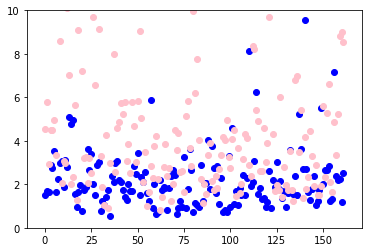

In [145]:
# z is walking direction, x is horizontal movement of the spine midpoint

#print(spineMidData[:,7])

spineWalk = spineMidData[:,7]
spineWalk = spineWalk[2]



'''
for i in range(spineWalk.size - 1):
    for j in range(spineWalk[i,:].size):
        point = spineWalk[i,j]
        spineWalk[i,j] = point
 '''       
        
distances = []
distancesGl = []
    
for i in range(208,370):
    walking = spineMidData[i,7]
    x = walking[:,0]
    y = walking[:,1]
    z = walking[:,2]
    
    xgl = glasses[:,0]
    ygl = glasses[:,1]
    zgl = glasses[:,2]
    
    glasses = spineMidData[i+839,7]
    
    average = np.average(x)
    averageArr = np.full((z.size), average)
    
    averageGL = np.average(xgl)
    averageGLArr = np.full((zgl.size), averageGL)
    
    '''
    plt.plot(x,z)
    
    
    
    plt.plot(averageArr, z, color='red')
    
    
    

    
    
    plt.plot(xgl,zgl, color='orange')
    plt.plot(averageGLArr, zgl, color='purple')
    plt.xlabel('spine midpoint movement')
    plt.ylabel('walking direction')
    plt.xlim(-0.3, 0.7)
    plt.savefig('2d_projections/projection%d.png' %i,)
    plt.show()
    
    '''
    
    #compute total distance
    dTotal = 0
    dGlTotal = 0
    
    for i in x:
        d = average - i
        if d < 0:
            d = -d
        dTotal += d
    distances.append(dTotal[0,0])
        
    for j in xgl:
        d = averageGL - j
        if d < 0:
            d = -d
        dGlTotal += d
    distancesGl.append(dGlTotal[0,0])

    '''
    plt.plot(y,z, color="purple")

    glasses = spineMidData[i+839,7]
    xgl = glasses[:,0]
    ygl = glasses[:,1]
    zgl = glasses[:,2]
    plt.plot(ygl, zgl, color='green')
    plt.xlabel('spine midpoint movement')
    plt.ylabel('walking direction')
    plt.xlim(-0.8, 0)
    plt.show()
    
    '''


#print(distances)
#print(distancesGl)

xaxis = np.arange(len(distances))

plt.scatter(xaxis, distances, color='blue')
plt.scatter(xaxis, distancesGl, color='pink')
plt.ylim(0, 10)
plt.savefig('distances.png')
plt.show()